In [197]:
#LOADING of dataset through pandas


import pandas as pd
colname=['sepal_length','sepal_width',' petal_length','petal_width','class_type']
df=pd.read_csv("F:/iris.csv",names=colname)
df.head(20)

,sepal_length,sepal_width,petal_length,petal_width,class_type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [198]:
#UNDERSTANDING of data with discriptive statistics
#2.1 dimension of dataset

print(df.shape)

(150, 5)


In [199]:
#2.2 data type of each attribute of dataset

print(df.dtypes)

sepal_length     float64
sepal_width      float64
 petal_length    float64
petal_width      float64
class_type        object
dtype: object


In [200]:
#2.3 discriptive statistics

pd.set_option('display.width', 100)
pd.set_option('precision', 3)
print(df.describe())

       sepal_length  sepal_width   petal_length  petal_width
count       150.000      150.000        150.000      150.000
mean          5.843        3.054          3.759        1.199
std           0.828        0.434          1.764        0.763
min           4.300        2.000          1.000        0.100
25%           5.100        2.800          1.600        0.300
50%           5.800        3.000          4.350        1.300
75%           6.400        3.300          5.100        1.800
max           7.900        4.400          6.900        2.500


In [201]:
#class distribution

class_count=df.groupby('class_type').size()

print(class_count)

class_type
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [202]:
#correlation between attributes


correlation=df.corr(method='pearson')

print(correlation)

               sepal_length  sepal_width   petal_length  petal_width
sepal_length          1.000       -0.109          0.872        0.818
sepal_width          -0.109        1.000         -0.421       -0.357
 petal_length         0.872       -0.421          1.000        0.963
petal_width           0.818       -0.357          0.963        1.000


The most common method for calculating correlation is Pearson’s Correlation Coeﬃcient, that assumes a normal distribution of the attributes involved.

A correlation of -1 or 1 shows a full negative or positive correlation respectively.

Whereas a value of 0 shows no correlation at all. 

Some machine learning algorithms like linear and logistic regression can suﬀer poor performance 
if there are highly correlated attributes in your dataset. 

The matrix lists all attributes across the top and down the side, to give correlation between all pairs of attributes (twice, because the matrix is symmetrical). 

You can see the diagonal line through the matrix from the top left to bottom right corners of the matrix shows perfect correlation of each attribute with itself.

In [203]:
#Skew of Univariate Distributions

skew=df.skew()
print(skew)

sepal_length     0.315
sepal_width      0.334
 petal_length   -0.274
petal_width     -0.105
dtype: float64


Skew refers to a distribution that is assumed Gaussian (normal or bell curve) that is shifted or squashed in one direction or another.

Many machine learning algorithms assume a Gaussian distribution. 

Knowing that an attribute has a skew may allow you to perform data preparation to correct the skew and later improve the accuracy of your models. 

The skew result show a positive (right) or negative (left) skew. Values closer to zero show less skew.

## understanding your data with visualization

### Univariate Plots

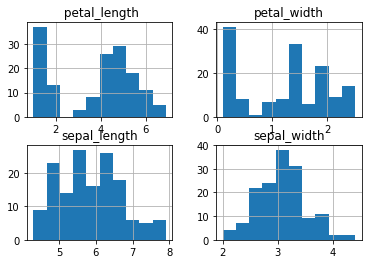

In [204]:
# Univariate Histograms

import matplotlib.pyplot as plt

df.hist()

plt.show()

Histograms group data into bins and provide you a count of the number of observations in each bin. 

From the shape of the bins you can quickly get a feeling for whether an attribute is Gaussian, 
skewed or even has an exponential distribution. 

It can also help you see possible outliers.

In above case ,sepal.length and sepal.width attributes may have a Gaussian or nearly Gaussian distribution. 

This is interesting because many machine learning techniques assume a Gaussian univariate distribution on the input variables.




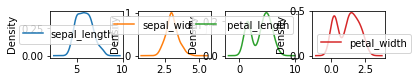

In [205]:
# Univariate Density Plot

df.plot(kind='density',subplots=True,layout=(4,4),sharex=False)

plt.show()

Density plots are another way of getting a quick idea of the distribution of each attribute.

We can see the distribution for each attribute is clearer than the histograms.


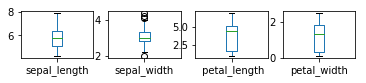

In [206]:
# Box and Whisker Plots

df.plot(kind='box',subplots=True,layout=(4,4),sharex=False,sharey=False)

plt.show()

Another useful way to review the distribution of each attribute is to use Box and Whisker Plots or boxplots for short. 

Boxplots summarize the distribution of each attribute, drawing a line for the median (middle value) and
a box around the 25th and 75th percentiles (the middle 50% of the data).

The whiskers give an idea of the spread of the data and dots outside of the whiskers show candidate outlier values (values that are 1.5 times greater than the size of spread of the middle 50% of the data).

in above case,petal_length and petal_width appear quite skewed towards smaller values.


### Multivariate Plots

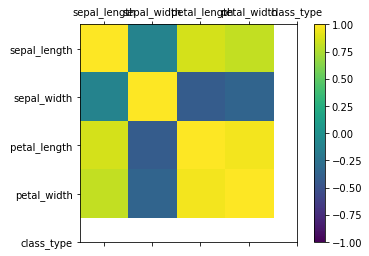

In [207]:
# Correction Matrix Plot

import numpy as np

correlation=df.corr()

#plot correlation matrix

fig=plt.figure()
ax=fig.add_subplot(111)
cax=ax.matshow(correlation,vmin=-1,vmax=1)
fig.colorbar(cax)

ticks=np.arange(0,5,1)

ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(colname)
ax.set_yticklabels(colname)

plt.show()


Correlation gives an indication of how related the changes are between two variables.

If two variables change in the same direction they are positively correlated.

If they change in opposite directions together (one goes up, one goes down), then they are negatively correlated. 

You can calculate the correlation between each pair of attributes. This is called a correlation matrix.

You can then plot the correlation matrix and get an idea of which variables have a high correlation with each other.

This is useful to know, because some machine learning algorithms like linear and logistic regression can have poor performance if there are highly correlated input variables in your data.

We can see that the matrix is symmetrical, i.e. the bottom left of the matrix is the same as the top right. 

This is useful as we can see two diﬀerent views on the same data in one plot.

We can also see that each variable is perfectly positively correlated with each other (as you would have expected) in the diagonal line from top left to bottom right.

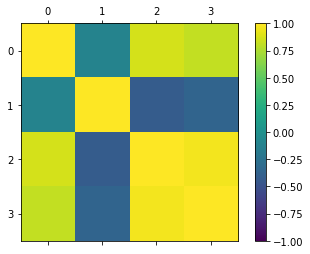

In [208]:
# Correction Matrix Plot (generic)

import numpy as np

correlation=df.corr()

# plot correlation matrix

fig=plt.figure()
ax=fig.add_subplot(111)
cax=ax.matshow(correlation,vmin=-1,vmax=1)
fig.colorbar(cax)
plt.show()

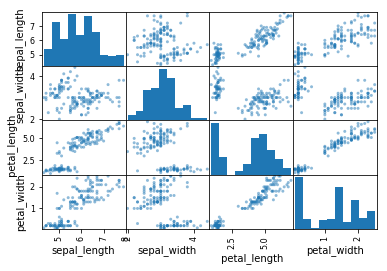

In [209]:
# Scatterplot Matrix

#from pandas.tools.plotting import scatter_matrix

from pandas.plotting import scatter_matrix

scatter_matrix(df)

plt.show()

A scatter plot shows the relationship between two variables as dots in two dimensions, one axis for each attribute. 

You can create a scatter plot for each pair of attributes in your data. 

Drawing all these scatter plots together is called a scatter plot matrix. 

Scatter plots are useful for spotting structured relationships between variables, like whether you could summarize the relationship between two variables with a line.

Attributes with structured relationships may also be correlated and good candidates for removal from your dataset.

Like the Correlation Matrix Plot above, the scatter plot matrix is symmetrical. This is useful to look at the pairwise relationships from diﬀerent perspectives. 

Because there is little point of drawing a scatter plot of each variable with itself, the diagonal shows histograms of each attribute.

## prepare your data for ML

In [210]:
## Rescale data (between 0 and 1)

from numpy import set_printoptions

from sklearn.preprocessing import MinMaxScaler

array=df.values

# separate array into input and output components

X=array[:,0:4]
Y=array[:,4]

scalar=MinMaxScaler(feature_range=(0,1))
rescaledX=scalar.fit_transform(X)

#summarize transformed data

set_printoptions(precision=3)

print(rescaledX[0:5,:])


[[0.222 0.625 0.068 0.042]
 [0.167 0.417 0.068 0.042]
 [0.111 0.5   0.051 0.042]
 [0.083 0.458 0.085 0.042]
 [0.194 0.667 0.068 0.042]]


C:\Users\sonu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


When your data is comprised of attributes with varying scales, many machine learning algorithms can beneﬁt from rescaling the attributes to all have the same scale.

Often this is referred to as normalization and attributes are often rescaled into the range between 0 and 1. 

This is useful for optimization algorithms used in the core of machine learning algorithms like gradient descent.

It is also useful for algorithms that weight inputs like regression and neural networks and algorithms that use distance measures like k-Nearest Neighbors. 

You can rescale your data using scikit-learn using the MinMaxScaler class.

In above case, After rescaling you can see that all of the values are in the range between 0 and 1..

In [211]:
## Standardize data (0 mean, 1 stdev)

from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions

array=df.values

# separate array into input and output components

X=array[:,0:4]
Y=array[:,4]

scaler=StandardScaler().fit(X)
rescaledX=scaler.transform(X)

# summarize transformed data

set_printoptions(precision=3)

print(rescaledX[0:5,:])


[[-0.901  1.032 -1.341 -1.313]
 [-1.143 -0.125 -1.341 -1.313]
 [-1.385  0.338 -1.398 -1.313]
 [-1.507  0.106 -1.284 -1.313]
 [-1.022  1.263 -1.341 -1.313]]


C:\Users\sonu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Standardization is a useful technique to transform attributes with a Gaussian distribution and diﬀering means and standard deviations to a standard Gaussian distribution with a mean of 0 and a standard deviation of 1.

It is most suitable for techniques that assume a Gaussian distribution in the input variables and work better with rescaled data, such as linear regression, logistic regression and linear discriminate analysis.

You can standardize data using scikit-learn with the StandardScaler class.

In [212]:
# Normalize data (length of 1)

from sklearn.preprocessing import Normalizer
from numpy import set_printoptions

array=df.values

# separate array into input and output components

X=array[:,0:4]
Y=array[:,4]

scaler=Normalizer().fit(X)
rescaledX=scaler.transform(X)

# summarize transformed data

set_printoptions(precision=3)

print(rescaledX[0:5,:])

[[0.804 0.552 0.221 0.032]
 [0.828 0.507 0.237 0.034]
 [0.805 0.548 0.223 0.034]
 [0.8   0.539 0.261 0.035]
 [0.791 0.569 0.221 0.032]]


Normalizing in scikit-learn refers to rescaling each observation (row) to have a length of 1 (called a unit norm or a vector with the length of 1 in linear algebra). 

This pre-processing method can be useful for sparse datasets (lots of zeros) with attributes of varying scales when using algorithms that weight input values such as neural networks and algorithms that use distance measures such as k-Nearest Neighbors. 

You can normalize data in Python with scikit-learn using the Normalizer class

In [213]:
# Normalize data (length of 1)

from sklearn.preprocessing import Binarizer
from numpy import set_printoptions

array=df.values

# separate array into input and output components
X=array[:,0:4]
Y=array[:,4]

binarizer=Binarizer(threshold=0.5).fit(X)
binaryX=binarizer.transform(X)

# summarize transformed data

set_printoptions(precision=3)

print(binaryX[0:5,:])

[[1. 1. 1. 0.]
 [1. 1. 1. 0.]
 [1. 1. 1. 0.]
 [1. 1. 1. 0.]
 [1. 1. 1. 0.]]


You can transform your data using a binary threshold. 

All values above the threshold are marked 1 and all equal to or below are marked as 0. 

This is called binarizing your data or thresholding your data.

It can be useful when you have probabilities that you want to make crisp values. 

It is also useful when feature engineering and you want to add new features that indicate something meaningful. 

You can create new binary attributes in Python using scikit-learn with the Binarizer class.

In above case ,You can see that all values equal or less than 0.5 are marked 0 and all of those above 0 are marked 1.

## Feature Selection For Machine Learning

In [214]:
# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)

from numpy import set_printoptions

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

array=df.values

X=array[:,0:4]
Y=array[:,4]

# feature extraction

test=SelectKBest(score_func=chi2,k=3)
fit=test.fit(X,Y)

# summarize scores

set_printoptions(precision=3)
print(fit.scores_)
print('\n')
features=fit.transform(X)

# summarize selected features

print(features[0:5,:])

[ 10.818   3.594 116.17   67.245]


[[5.1 1.4 0.2]
 [4.9 1.4 0.2]
 [4.7 1.3 0.2]
 [4.6 1.5 0.2]
 [5.  1.4 0.2]]


Statistical tests can be used to select those features that have the strongest relationship with the output variable.

The scikit-learn library provides the SelectKBest class that can be used with a suite of diﬀerent statistical tests to select a speciﬁc number of features.

The example above uses the chi-squared (chi2) statistical test for non-negative features to select 3 of the best features from iris dataset.

You can see the scores for each attribute and the 3 attributes chosen (those with the highest scores):(sepal_length,petal_length,petal_width)



In [215]:
# Feature Extraction with RFE

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

array=df.values
X=array[:,0:4]
Y=array[:,4]

# feature extraction

model=LogisticRegression()
rfe=RFE(model,2)
fit=rfe.fit(X,Y)

print("number of features to be selected \n",fit.n_features_)
print("selected features",fit.support_)
print("feature ranking",fit.ranking_)


number of features to be selected 
 2
selected features [False  True False  True]
feature ranking [3 1 2 1]


The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain. 

It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute. 

The example below uses RFE with the logistic regression algorithm to select the top 2 features. 

The choice of algorithm does not matter too much as long as it is skillful and consistent.



In [216]:
# Feature Extraction with PCA

from sklearn.decomposition import PCA

array=df.values

X=array[:,0:4]
Y=array[:,4]

# feature extraction

pca=PCA(n_components=2)
fit=pca.fit(X)

# summarize components

print("explained variance \n",fit.explained_variance_ratio_)
print(fit.components_)


explained variance 
 [0.925 0.053]
[[ 0.362 -0.082  0.857  0.359]
 [ 0.657  0.73  -0.176 -0.075]]


Principal Component Analysis (or PCA) uses linear algebra to transform the dataset into a compressed form. 

Generally this is called a data reduction technique.

A property of PCA is that you can choose the number of dimensions or principal components in the transformed result. 

In the example below, we use PCA and select 2 principal components. 

In [217]:
# Feature Importance with Extra Trees Classifier

from sklearn.ensemble import ExtraTreesClassifier

array=df.values

X=array[:,0:4]
Y=array[:,4]

# feature extraction

model=ExtraTreesClassifier()
model.fit(X,Y)

print(model.feature_importances_)

[0.067 0.059 0.336 0.537]


Bagged decision trees like Random Forest and Extra Trees can be used to estimate the importance of features. 

In the example below we construct a ExtraTreesClassifier classiﬁer for the iris dataset.

In the above case,You can see that we are given an importance score for each attribute where the larger the score, 

the more important the attribute. 

The scores suggest at the importance of petal_width, petal_length and sepal_length.

## Evaluate the Performance of ML  Algorithms with Resampling

In [218]:
# Evaluate using a train and a test set

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

array=df.values

X=array[:,0:4]
Y=array[:,4]

test_size=0.30
seed=7

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=test_size,random_state=seed)

model=LogisticRegression()
model.fit(X_train, Y_train)

result=model.score(X_test,Y_test)

print("accuracy",result*100.0)


accuracy 88.88888888888889


 We can take our original dataset and split it into two parts. 
 
 Train the algorithm on the ﬁrst part, make predictions on the second part and evaluate the predictions against the expected results. 
 
 The size of the split can depend on the size and speciﬁcs of your dataset, although it is common to use 67% of the data for training and the remaining 33% for testing. 
 
 This algorithm evaluation technique is very fast. 
 It is ideal for large datasets (millions of records) where there is strong evidence that both splits of the data are representative of the underlying problem.
 
 A downside of this technique is that it can have a high variance. This means that diﬀerences in the training and test dataset can result in meaningful diﬀerences in the estimate of accuracy. 
 
 Note that in addition to specifying the size of the split, we also specify the random seed. Because the split of the data is random, we want to ensure that the results are reproducible. 
 
 By specifying the random seed we ensure that we get the same random numbers each time we run the code and in turn the same split of data.  

In [219]:
# Evaluate using Cross Validation

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

array=df.values
X=array[:,0:4]
Y=array[:,4]
seed=7
num_fold=10

kfold=KFold(n_splits=num_fold,random_state=seed)
model=LogisticRegression()

results=cross_val_score(model,X,Y,cv=kfold)

print("accuracy :",results.mean()*100,results.std()*100)



accuracy : 87.99999999999999 14.847371634213394


Cross validation is an approach that you can use to estimate the performance of a machine learning algorithm with less variance than a single train-test set split.

It works by splitting the dataset into k-parts (e.g. k = 5 or k = 10). 

Each split of the data is called a fold. The algorithm is trained on k−1 folds with one held back and tested on the held back fold.

This is repeated so that each fold of the dataset is given a chance to be the held back test set.

After running cross validation you end up with k diﬀerent performance scores that you can summarize using a mean and a standard deviation.

 It is more accurate because the algorithm is trained and evaluated multiple times on diﬀerent data. 
 
 The choice of k must allow the size of each test partition to be large enough to be a reasonable sample of the problem, whilst allowing enough repetitions of the train-test evaluation of the algorithm to provide a fair estimate of the algorithms performance on unseen data. 
 
 For modest sized datasets in the thousands or tens of thousands of records, k values of 3, 5 and 10 are common.

In [220]:
# Evaluate using Leave One Out Cross Validation

from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

array=df.values
X=array[:,0:4]
Y=array[:,4]
num_folds=10

loocv=LeaveOneOut()
model=LogisticRegression()

results=cross_val_score(model,X,Y,cv=loocv)

print("accuracy :",results.mean()*100.0,results.std()*100)

accuracy : 95.33333333333334 21.092389359408497


You can conﬁgure cross validation so that the size of the fold is 1 (k is set to the number of observations in your dataset). 
This variation of cross validation is called leave-one-out cross validation.

The result is a large number of performance measures that can be summarized in an eﬀort to give a more reasonable estimate of the accuracy of your model on unseen data. 

A downside is that it can be a computationally more expensive procedure than k-fold cross validation. 

You can see in the standard deviation that the score has more variance than the k-fold cross validation results described above.

In [221]:
# Evaluate using Shuffle Split Cross Validation

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

array=df.values
X=array[:,0:4]
Y=array[:,4]
n_splits=10
test_size=0.33
seed=7

kfolds=ShuffleSplit(n_splits=n_splits,test_size=test_size,random_state=seed)
model=LogisticRegression()

results=cross_val_score(model,X,Y,cv=kfolds)
print("accuracy :",results.mean()*100.0,results.std()*100.0)



accuracy : 93.80000000000001 3.0265491900843093


Another variation on k-fold cross validation is to create a random split of the data like the train/test split described above, 

but repeat the process of splitting and evaluation of the algorithm multiple times, like cross validation. 

This has the speed of using a train/test split and the reduction in variance in the estimated performance of k-fold cross validation.

You can also repeat the process many more times as needed to improve the accuracy. 

A down side is that repetitions may include much of the same data in the train or the test split from run to run, introducing redundancy into the evaluation.

We can see that in this case the distribution of the performance measure is on par with k-fold cross validation above.

## Machine Learning Algorithm Performance Metrics

### Classiﬁcation Metrics

In [222]:
# Cross Validation Classification Accuracy

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

array=df.values
X=array[:,0:4]
Y=array[:,4]

kfolds=KFold(n_splits=10,random_state=7)
model=LogisticRegression()

scoring='accuracy'
results=cross_val_score(model,X,Y,cv=kfolds,scoring=scoring)

print("accuracy :",results.mean(),results.std())

accuracy : 0.8799999999999999 0.14847371634213394


Classiﬁcation accuracy is the number of correct predictions made as a ratio of all predictions made. 

This is the most common evaluation metric for classiﬁcation problems, it is also the most misused.

It is really only suitable when there are an equal number of observations in each class (which is rarely the case) and that all predictions and prediction errors are equally important, which is often not the case.

You can see that the ratio is reported. This can be converted into a percentage by multiplying the value by 100


In [223]:
# Cross Validation Classification LogLoss

#from sklearn.model_selection import KFold 
#from sklearn.model_selection import cross_val_score 
#from sklearn.linear_model import LogisticRegression

#array=df.values
#X=array[:,0:4]
#Y=array[:,4]

#kfold = KFold(n_splits=10, random_state=7) 
#model = LogisticRegression() 
#scoring = 'neg_log_loss'
#results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring) 

#print("accuracy :",results.mean(),results.std())

Logarithmic loss (or logloss) is a performance metric for evaluating the predictions of probabilities of membership to a given class. 
The scalar probability between 0 and 1 can be seen as a measure of conﬁdence for a prediction by an algorithm.

Predictions that are correct or incorrect are rewarded or punished proportionally to the conﬁdence of the prediction. 

Smaller logloss is better with 0 representing a perfect logloss. As mentioned above, the measure is inverted to be ascending when using the cross val score() function.


In the above case,there is only one class involved not any binary class. it is applicable to binary classiﬁcation problem 

In [224]:
# Cross Validation Classification LogLoss

#from sklearn.model_selection import KFold 
#from sklearn.model_selection import cross_val_score 
#from sklearn.linear_model import LogisticRegression

#array=df.values
#X=array[:,0:4]
#Y=array[:,4]

#kfold = KFold(n_splits=10, random_state=7) 
#model = LogisticRegression() 
#scoring = roc_auc'
#results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring) 

#print("accuracy :",results.mean(),results.std())

Area under ROC Curve (or AUC for short) is a performance metric for binary classiﬁcation problems. 

The AUC represents a model’s ability to discriminate between positive and negative classes. 

An area of 1.0 represents a model that made all predictions perfectly. 

An area of 0.5 represents a model that is as good as random.

ROC can be broken down into sensitivity and speciﬁcity. A binary classiﬁcation problem is really a trade-oﬀ between sensitivity and speciﬁcity.

 Sensitivity is the true positive rate also called the recall. It is the number of instances from the positive (ﬁrst) class that actually predicted correctly.

 Speciﬁcity is also called the true negative rate. Is the number of instances from the negative (second) class that were actually predicted correctly.

In the above case,there is only one class involved not any binary class. it is applicable to binary classiﬁcation problem 


In [225]:
# Cross Validation Classification Confusion Matrix

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix

array=df.values

X=array[:,0:4]
Y=array[:,4]

test_size=0.30
seed=7

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=test_size,random_state=seed)

model=LogisticRegression()
model.fit(X_train, Y_train)

predicted = model.predict(X_test) 

matrix = confusion_matrix(Y_test, predicted) 

print(matrix)

[[12  0  0]
 [ 0 12  4]
 [ 0  1 16]]


The confusion matrix is a handy presentation of the accuracy of a model with two or more classes. 

The table presents predictions on the x-axis and accuracy outcomes on the y-axis.

The cells of the table are the number of predictions made by a machine learning algorithm. 

For example, a machine learning algorithm can predict 0 or 1 and each prediction may actually have been a 0 or 1.

Predictions for 0 that were actually 0 appear in the cell for prediction = 0 and actual = 0, 

whereas predictions for 0 that were actually 1 appear in the cell for prediction = 0 and actual = 1. And so on.

Although the array is printed without headings, you can see that the majority of the predictions fall on the diagonal line of the matrix (which are correct predictions).


In [226]:
# Cross Validation Classification Report

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

array=df.values

X=array[:,0:4]
Y=array[:,4]

test_size=0.30
seed=7

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=test_size,random_state=seed)

model=LogisticRegression()
model.fit(X_train,Y_train)

predicted=model.predict(X_test)

report=classification_report(Y_test,predicted)

print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.92      0.75      0.83        16
 Iris-virginica       0.80      0.94      0.86        17

    avg / total       0.90      0.89      0.89        45



The scikit-learn library provides a convenience report when working on classiﬁcation problems to give you a quick idea of the accuracy of a model using a number of measures. 

The classification report() function displays the precision, recall, F1-score and support for each class.

## Spot-Check Classiﬁcation Algorithms

### Linear Machine Learning Algorithms

In [227]:
# Logistic Regression Classification

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression

array=df.values

X=array[:,0:4]
Y=array[:,4]
num_folds=10

kfold=KFold(n_splits=num_folds,random_state=7)
model=LogisticRegression()
result=cross_val_score(model,X,Y,cv=kfold)

print("accuracy :",result.mean())

accuracy : 0.8799999999999999


Logistic regression assumes a Gaussian distribution for the numeric input variables and can model binary classiﬁcation problems.

You can construct a logistic regression model using the LogisticRegression class.

Running the example prints the mean estimated accuracy.

In [228]:
# LDA Classification

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

array=df.values

X=array[:,0:4]
Y=array[:,4]

num_folds=10

kfolds=KFold(n_splits=num_folds,random_state=10)
model=LinearDiscriminantAnalysis()
result=cross_val_score(model,X,Y,cv=kfolds)

print("accuracy",result.mean())

accuracy 0.9666666666666668


C:\Users\sonu\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\sonu\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\sonu\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\sonu\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\sonu\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\sonu\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


Linear Discriminant Analysis or LDA is a statistical technique for binary and multiclass classiﬁcation. 

It too assumes a Gaussian distribution for the numerical input variables.

You can construct an LDA model using the LinearDiscriminantAnalysis class.

Running the example prints the mean estimated accuracy.


### Nonlinear Machine Learning Algorithms

In [229]:
# KNN Classificatio

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier

array=df.values
X=array[:,0:4]
Y=array[:,4]

num_folds=10

kfold=KFold(n_splits=num_folds,random_state=7)
model=KNeighborsClassifier()

result=cross_val_score(model,X,Y,cv=kfold)

print("accuracy",result.mean())

accuracy 0.9333333333333333


The k-Nearest Neighbors algorithm (or KNN) uses a distance metric to ﬁnd the k most similar instances in the training data for a new instance and takes the mean outcome of the neighbors as the prediction. 

You can construct a KNN model using the KNeighborsClassifier class.

Running the example prints the mean estimated accuracy.

In [230]:
# Gaussian Naive Bayes Classification

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB

array=df.values
X=array[:,0:4]
Y=array[:,4]
num_folds=10

kfold=KFold(n_splits=num_folds,random_state=7)
model=GaussianNB()

result=cross_val_score(model,X,Y,cv=kfold)

print("accuracy :",result.mean())

accuracy : 0.9466666666666667


Naive Bayes calculates the probability of each class and the conditional probability of each class given each input value. 

These probabilities are estimated for new data and multiplied together, assuming that they are all independent (a simple or naive assumption). 

When working with real-valued data, a Gaussian distribution is assumed to easily estimate the probabilities for input variables using the Gaussian Probability Density Function.

You can construct a Naive Bayes model using the GaussianNB class.

Running the example prints the mean estimated accuracy.

In [231]:
# CART Classification

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier

array=df.values

X=array[:,0:4]
Y=array[:,4]

num_fold=10

kfolds=KFold(n_splits=num_fold,random_state=7)
model=DecisionTreeClassifier()

result=cross_val_score(model,X,Y,cv=kfolds)

print("accuracy:",result.mean())

accuracy: 0.9333333333333333


Classiﬁcation and Regression Trees (CART or just decision trees) construct a binary tree from the training data. 

Split points are chosen greedily by evaluating each attribute and each value of each attribute in the training data in order to minimize a cost function (like the Gini index). 

You can construct a CART model using the DecisionTreeClassifier class.

Running the example prints the mean estimated accuracy.

In [232]:
# SVM Classification

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

array=df.values
X=array[:,0:4]
Y=array[:,4]

num_fold=10

kfold=KFold(n_splits=num_fold,random_state=7)
model=SVC()

result=cross_val_score(model,X,Y,cv=kfold)

print("accuracy:",result.mean())

accuracy: 0.9533333333333334


Support Vector Machines (or SVM) seek a line that best separates two classes. 

Those data instances that are closest to the line that best separates the classes are called support vectors and inﬂuence where the line is placed. 

SVM has been extended to support multiple classes. Of particular importance is the use of diﬀerent kernel functions via the kernel parameter.

A powerful Radial Basis Function is used by default. You can construct an SVM model using the SVC class.


Running the example prints the mean estimated accuracy.

## Compare Machine Learning Algorithms

('LR', 0.8799999999999999, 0.14847371634213394)
('LDA', 0.9666666666666668, 0.061463629715285906)
('svm', 0.9533333333333334, 0.052068331172711015)
('CART', 0.9533333333333334, 0.052068331172711015)
('KNN', 0.9333333333333333, 0.08432740427115676)
('NB', 0.9466666666666667, 0.0581186525805423)


C:\Users\sonu\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\sonu\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\sonu\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\sonu\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\sonu\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\sonu\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


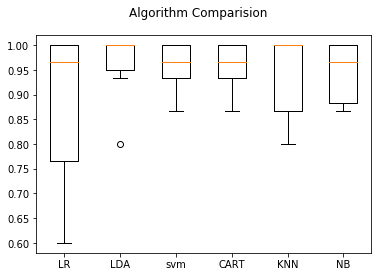

In [233]:
# Compare Algorithms

import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

array=df.values
X=array[:,0:4]
Y=array[:,4]
num_fold=10

# prepare models

models=[]

models.append(('LR',LogisticRegression()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('svm',SVC()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('NB',GaussianNB()))

# evaluate each model in turn

results=[]
names=[]
score='accuracy'

for name,model in models:
    kfold=KFold(n_splits=num_fold,random_state=7)
    cv_results=cross_val_score(model,X,Y,cv=kfold,scoring=score)
    results.append(cv_results)
    names.append(name)
    msg=(name,cv_results.mean(),cv_results.std())
    print(msg)
    
# boxplot algorithm comparison

fig=plt.figure()
fig.suptitle('Algorithm Comparision')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

    



When you have a new dataset, it is a good idea to visualize the data using diﬀerent techniques in order to look at the data from diﬀerent perspectives.

The same idea applies to model selection. 

You should use a number of diﬀerent ways of looking at the estimated accuracy of your machine learning algorithms in order to choose the one or two algorithm to ﬁnalize. 

A way to do this is to use visualization methods to show the average accuracy, variance and other properties of the distribution of model accuracies. 

Running the example provides a list of each algorithm short name, the mean accuracy and the standard deviation accuracy.

The example also provides a box and whisker plot showing the spread of the accuracy scores across each cross validation fold for each algorithm.

From these results, it would suggest thatlinear discriminant analysis ,CART,KNN are perhaps worthy of further study on this problem.

## Automate Machine Learning Workﬂows with Pipelines

### Data Preparation and Modeling Pipeline

In [234]:
# Create a pipeline that standardizes the data then creates a model

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

array=df.values
X=array[:,0:4]
Y=array[:,4]

#create pipeline

estimator=[]
estimator.append(('scaler',StandardScaler()))
estimator.append(('LDA',LinearDiscriminantAnalysis()))
model=Pipeline(estimator)

# evaluate pipeline

kfold=KFold(n_splits=10,random_state=7)
results=cross_val_score(model,X,Y,cv=kfold)

print(results.mean())


0.9666666666666668


C:\Users\sonu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\sonu\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\sonu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\sonu\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\sonu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\sonu\Anaconda3\lib\site-packages\sklearn\discr

 Data preparation is one easy way to leak knowledge of the whole training dataset to the algorithm.
 
 For example, preparing your data using normalization or standardization on the entire training dataset before learning would not be a valid test because the training dataset would have been inﬂuenced by the scale of the data in the test set. 


Pipelines help you prevent data leakage in your test harness by ensuring that data preparation like standardization is constrained to each fold of your cross validation procedure. 

Notice how we create a Python list of steps that are provided to the Pipeline for process the data. 

Also notice how the Pipeline itself is treated like an estimator and is evaluated in its entirety by the k-fold cross validation procedure. 

Running the example provides a summary of accuracy of the setup on the dataset.

### Feature Extraction and Modeling Pipeline

In [235]:
# Create a pipeline that extracts features from the data then creates a model

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest

array=df.values
X=array[:,0:4]
Y=array[:,4]

# create feature union

features = [] 
features.append(('pca', PCA(n_components=3))) 
features.append(('select_best', SelectKBest(k='all')))
feature_union = FeatureUnion(features)

# create pipeline 

estimators = [] 
estimators.append(('feature_union', feature_union)) 
estimators.append(('logistic', LogisticRegression())) 
model = Pipeline(estimators) 

# evaluate pipeline 

kfold = KFold(n_splits=10, random_state=7) 
results = cross_val_score(model, X, Y, cv=kfold) 

print(results.mean())


0.9066666666666666


Feature extraction is another procedure that is susceptible to data leakage. 

Like data preparation, feature extraction procedures must be restricted to the data in your training dataset. 

The pipeline provides a handy tool called the FeatureUnion which allows the results of multiple feature selection and extraction procedures to be combined into a larger dataset on which a model can be trained. 

Importantly, all the feature extraction and the feature union occurs within each fold of the cross validation procedure.

The example below demonstrates the pipeline deﬁned with four steps:
1. Feature Extraction with Principal Component Analysis (3 features).
2. Feature Extraction with Statistical Selection (6 features).
3. Feature Union.
4. Learn a Logistic Regression Model.

The pipeline is then evaluated using 10-fold cross validation.

Notice how the FeatureUnion is it’s own Pipeline that in turn is a single step in the ﬁnal Pipeline used to feed Logistic Regression.

This might get you thinking about how you can start embedding pipelines within pipelines. 

Running the example provides a summary of accuracy of the setup on the dataset

## Improve Performance with Ensembles

### Bagging Algorithms

### Bagged Decision Trees

In [236]:
# Bagged Decision Trees for Classification
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

array=df.values
X=array[:,0:4]
Y=array[:,4]

seed=7
kfold=KFold(n_splits=10,random_state=7)

cart=DecisionTreeClassifier()
n_tree=100

model=BaggingClassifier(base_estimator=cart,n_estimators=n_tree,random_state=seed)

result=cross_val_score(model,X,Y,cv=kfold)

print(result.mean())

0.9466666666666667


Bagging: Building multiple models (typically of the same type) from diﬀerent subsamples of the training dataset.

Bootstrap Aggregation (or Bagging) involves taking multiple samples from your training dataset (with replacement) and training a model for each sample. 
The ﬁnal output prediction is averaged across the predictions of all of the sub-models. 

Bagging performs best with algorithms that have high variance. 

A popular example are decision trees, often constructed without pruning.

In the example below is an example of using the BaggingClassifier with the Classiﬁcation and Regression Trees algorithm (DecisionTreeClassifier1). A total of 100 trees are created.



### Random Forest

In [237]:
# Random Forest Classification

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

array=df.values
X=array[:,0:4]
Y=array[:,4]

n_tree=100
max_feature=3

kfold=KFold(n_splits=10,random_state=7)

model=RandomForestClassifier(n_estimators=n_tree,max_features=max_feature)

result=cross_val_score(model,X,Y,cv=kfold)

print(result.mean())


0.9466666666666667


Random Forests is an extension of bagged decision trees. 

Samples of the training dataset are taken with replacement, but the trees are constructed in a way that reduces the correlation between individual classiﬁers. 

Speciﬁcally, rather than greedily choosing the best split point in the construction of each tree, only a random subset of features are considered for each split. 

You can construct a Random Forest model for classiﬁcation using the RandomForestClassifier class.

The example below demonstrates using Random Forest for classiﬁcation with 100 trees and split points chosen from a random selection of 3 features.


### Extra Trees

In [238]:
# Extra Trees Classification

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import ExtraTreesClassifier


array=df.values
X=array[:,0:4]
Y=array[:,4]

n_tree=100
max_feature=3

kfold=KFold(n_splits=10,random_state=7)

model=ExtraTreesClassifier(n_estimators=n_tree,max_features=max_feature)

result=cross_val_score(model,X,Y,cv=kfold)

print(result.mean())

0.9400000000000001


Extra Trees are another modiﬁcation of bagging where random trees are constructed from samples of the training dataset. 

You can construct an Extra Trees model for classiﬁcation using the ExtraTreesClassifier class. 

The example below provides a demonstration of extra trees with the number of trees set to 100 and splits chosen from 3 random features.

### Boosting Algorithms

### AdaBoost

In [239]:
# AdaBoost Classification

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import AdaBoostClassifier

array=df.values
X=array[:,0:4]
Y=array[:,4]

n_tree=30
seed=7

kfold=KFold(n_splits=10,random_state=seed)

model=AdaBoostClassifier(n_estimators=n_tree,random_state=seed)

result=cross_val_score(model,X,Y,cv=kfold)

print(result.mean())


0.9400000000000001


Boosting: Building multiple models (typically of the same type) each of which learns to ﬁx the prediction errors of a prior model in the sequence of models.

Boosting ensemble algorithms creates a sequence of models that attempt to correct the mistakes of the models before them in the sequence. 

Once created, the models make predictions which may be weighted by their demonstrated accuracy and the results are combined to create a ﬁnal output prediction.

AdaBoost was perhaps the ﬁrst successful boosting ensemble algorithm.

It generally works by weighting instances in the dataset by how easy or diﬃcult they are to classify, allowing the algorithm to pay or less attention to them in the construction of subsequent models. 

You can construct an AdaBoost model for classiﬁcation using the AdaBoostClassifier class4.

The example above demonstrates the construction of 30 decision trees in sequence using the AdaBoost algorithm.


### Stochastic Gradient Boosting

In [240]:
# Stochastic Gradient Boosting Classification

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier

array=df.values
X=array[:,0:4]
Y=array[:,4]

n_tree=100
seed=7

kfold=KFold(n_splits=10,random_state=seed)

model=GradientBoostingClassifier(n_estimators=n_tree,random_state=seed)

result=cross_val_score(model,X,Y,cv=kfold)

print(result.mean())


0.9400000000000001


Stochastic Gradient Boosting (also called Gradient Boosting Machines) are one of the most sophisticated ensemble techniques. 

It is also a technique that is proving to be perhaps one of the best techniques available for improving performance via ensembles.

You can construct a Gradient Boosting model for classiﬁcation using the GradientBoostingClassifier class. 

The example above demonstrates Stochastic Gradient Boosting for classiﬁcation with 100 trees.


### Voting Ensemble

In [241]:
# Voting Ensemble for Classification

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier


array=df.values
X=array[:,0:4]
Y=array[:,4]

n_tree=100
seed=7

kfold=KFold(n_splits=10,random_state=seed)

# create the sub models

estimators=[]
model1=LogisticRegression()
estimators.append(('logistic',model1))
model2=DecisionTreeClassifier()
estimators.append(('cart',model2))
model3=SVC()
estimators.append(('svm',model3))

# create the ensemble model

model=VotingClassifier(estimators)

result=cross_val_score(model,X,Y,cv=kfold)

print(result.mean())


0.9466666666666667


C:\Users\sonu\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\sonu\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\sonu\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\sonu\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in fu

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms. 

It works by ﬁrst creating two or more standalone models from your training dataset.

A Voting Classiﬁer can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

The predictions of the sub-models can be weighted, but specifying the weights for classiﬁers manually or even heuristically is diﬃcult. 

You can create a voting ensemble model for classiﬁcation using the VotingClassifier class. 

The code above provides an example of combining the predictions of logistic regression, classiﬁcation and regression trees and support vector machines together for a classiﬁcation problem.


## Improve Performance with Algorithm Tuning

### Grid Search Parameter Tuning

In [242]:
# Grid Search for Algorithm Tuning

#import numpy  as np
#from sklearn.linear_model import Ridge 
#from sklearn.model_selection import GridSearchCV 

#array=df.values
#X=array[:,0:4]
#Y=array[:,4]

#alphas=np.array([1,0.1,0.01,0.001,0.0001,0])

#param_grid=dict(alpha=alphas)
#model=Ridge()
#grid=GridSearchCV(estimator=model,param_grid=param_grid)
#grid.fit(X,Y)

#print(grid.best_score_) 
#print(grid.best_estimator_.alpha)


### Random Search Parameter Tuning

In [243]:
# Randomized for Algorithm Tuning
#import numpy as np
#from scipy.stats import uniform
#from sklearn.linear_model import Ridge
#from sklearn.model_selection import RandomizedSearchCV

#array=df.values
#X=array[:,0:4]
#Y=array[:,4]

#param_grid={'alpha':uniform()}
#model=Ridge()

#rsearch=RandomizedSearchCV(estimator=model,param_distributions=param_grid,n_iter=100,random_state=7)
#rsearch.fit(X,Y)

#print(rsearch.best_score_)
#print(rsearch.best_estimator_.alpha)

Random search is an approach to parameter tuning that will sample algorithm parameters from a random distribution (i.e. uniform) for a ﬁxed number of iterations. 

A model is constructed and evaluated for each combination of parameters chosen.

You can perform a random search for algorithm parameters using the RandomizedSearchCV class. 

The example above evaluates diﬀerent random alpha values between 0 and 1 for the Ridge Regression algorithm on the standard diabetes dataset. 

A total of 100 iterations are performed with uniformly random alpha values selected in the range between 0 and 1 (the range that alpha values can take).


## Save and Load Machine Learning Models

### Finalize Your Model with pickle

In [244]:
# Save Model Using Pickle

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from pickle import dump
from pickle import load

array=df.values
X=array[:,0:4]
Y=array[:,4]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=7)

# Fit the model on 33%

model=LogisticRegression()
model.fit(X_train,Y_train)

# save the model to disk

filename="F:\\finalize_model\'finalized_model.sav"
dump(model,open(filename,'wb'))


In [245]:
# some time later...
# load the model from disk

loaded_model=load(open(filename,'rb'))
result=loaded_model.score(X_test,Y_test)
print(result)

0.9


Pickle is the standard way of serializing objects in Python. 
You can use the pickle1 operation to serialize your machine learning algorithms and save the serialized format to a ﬁle. 
Later you can load this ﬁle to deserialize your model and use it to make new predictions. 

## Finalize Your Model with Joblib

In [248]:
# Save Model Using joblib

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.externals.joblib import load
from sklearn.externals.joblib import dump

array=df.values
X=array[:,0:4]
Y=array[:,4]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=7)

model=LogisticRegression()
model.fit(X_train,Y_train)

filename="F:\\finalized_model_joblib.sav"
dump(model,filename)

['F:\\finalized_model_joblib.sav']

In [249]:
# some time later...
# load the model from disk

loaded_model=load(filename)
result=loaded_model.score(X_test,Y_test)
print(result)

0.9


The Joblib library is part of the SciPy ecosystem and provides utilities for pipelining Python jobs.

It provides utilities for saving and loading Python objects that make use of NumPy data structures, eﬃciently. 

This can be useful for some machine learning algorithms that require a lot of parameters or store the entire dataset (e.g. k-Nearest Neighbors). 